<a href="https://colab.research.google.com/github/Kewal1903/ML-Quest-codes/blob/main/Hackathon(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


**Team Name :- The Syndicate**


---


**Team Members:- Shasmeet Shinde, Kewal Thacker, Vishnu Pai**


---


**Problem Statement :- Identifying Fake Job Listings: Build a classification model to determine the legitimacy of job postings.**


---



Importing required libraries.

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report,accuracy_score, roc_auc_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

Loading the dataset.

In [ ]:
df = pd.read_csv("/content/job_train.csv")
df.dropna(inplace = True)
df

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0
...,...,...,...,...,...,...,...,...
8934,Data Manager--Fixed Income,"US, NY, New York","The salary is open, DOE. This role manages 4 D...",Required Skills:BA/BS in Business Administrati...,0,0,0,0
8935,Financial Analyst,"GR, I, Paiania","Financial analysis, reporting and review of de...",Postgraduate degree required. Economics or Fin...,0,1,1,0
8936,Customer Service Associate - Part Time,"CA, ON, Peterborough",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,0,1,0,0
8937,Sales Manager,"UA, 61, Ternopil","Responsibilitiesactive sales, realization of c...",Main requirementsexperience with Sales (2+ yea...,0,0,1,0


Preprocessing the text fields: Checking for validity of words, removing extra spaces and punctuations, simplifying words to their word roots using WordNetLemmatizer. This makes it easier to identify similar entires in text fields and can help in encoding them later.

In [ ]:
import re
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r"\W", " ",text)
  text = re.sub(r"\s", " ",text)
  stop_words = set(stopwords.words("english"))
  lemmatizer = WordNetLemmatizer()
  words = text.split()
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
  return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df["title"] = df["title"].apply(preprocess_text)
df["description"] = df["description"].apply(preprocess_text)
df["location"] = df["location"].apply(preprocess_text)
df["requirements"] = df["requirements"].apply(preprocess_text)
df

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,architect middleware mq kuwait,kw ku,behalf client well known multinational retail ...,working technical knowledge system fundamental...,0,1,0,0
1,interviewing sale rep position management trai...,u tx corpus christi,argenta field solution rapidly expanding award...,name,0,1,0,0
2,process control staff engineer foxboro tricone...,u tx usa southwest,experienced process control staff engineer req...,least 10 year degreed professional experience ...,0,0,0,0
3,experienced telemarketer wanted digital solution,au nsw,passion people love sell telephone role overvi...,responsibility prospecting following lead gene...,0,1,0,0
4,senior network engineer,gb eng london,successful senior network engineer must jncia ...,essential skill juniper switching routing secu...,0,1,0,0
...,...,...,...,...,...,...,...,...
8934,data manager fixed income,u ny new york,salary open doe role manages 4 data analyst in...,required skill ba b business administration fi...,0,0,0,0
8935,financial analyst,gr paiania,financial analysis reporting review department...,postgraduate degree required economics finance...,0,1,1,0
8936,customer service associate part time,ca peterborough,customer service associate based peterborough ...,minimum requirement minimum 6 month customer s...,0,1,0,0
8937,sale manager,ua 61 ternopil,responsibilitiesactive sale realization compan...,main requirementsexperience sale 2 year fluent...,0,0,1,0


Encoding title and location fields in order to associate different listings having same title or location.

In [ ]:
label_encoder = LabelEncoder()
df["title"] = label_encoder.fit_transform(df["title"])
df["location"] = label_encoder.fit_transform(df["location"])
df

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,238,527,behalf client well known multinational retail ...,working technical knowledge system fundamental...,0,1,0,0
1,2137,1528,argenta field solution rapidly expanding award...,name,0,1,0,0
2,3184,1570,experienced process control staff engineer req...,least 10 year degreed professional experience ...,0,0,0,0
3,1431,29,passion people love sell telephone role overvi...,responsibility prospecting following lead gene...,0,1,0,0
4,3931,244,successful senior network engineer must jncia ...,essential skill juniper switching routing secu...,0,1,0,0
...,...,...,...,...,...,...,...,...
8934,994,1339,salary open doe role manages 4 data analyst in...,required skill ba b business administration fi...,0,0,0,0
8935,1486,469,financial analysis reporting review department...,postgraduate degree required economics finance...,0,1,1,0
8936,898,92,customer service associate based peterborough ...,minimum requirement minimum 6 month customer s...,0,1,0,0
8937,3629,1682,responsibilitiesactive sale realization compan...,main requirementsexperience sale 2 year fluent...,0,0,1,0


Visualizing relations between certain parameters and the legitimacy of the job postings.

In [ ]:
crosstab1 = pd.crosstab(df["fraudulent"], df["has_questions"])
crosstab1.index = ["Not Fraudulent", "Fraudulent"]
crosstab1.columns = ["No Questions", "Has questions"]
crosstab1

,No Questions,Has questions
Not Fraudulent,3255,3901
Fraudulent,254,123


In [ ]:
crosstab2 = pd.crosstab(df["fraudulent"], df["has_company_logo"])
crosstab2.index = ["Not Fraudulent", "Fraudulent"]
crosstab2.columns = ["No Logo", "Has Logo"]
crosstab2

,No Logo,Has Logo
Not Fraudulent,979,6177
Fraudulent,223,154


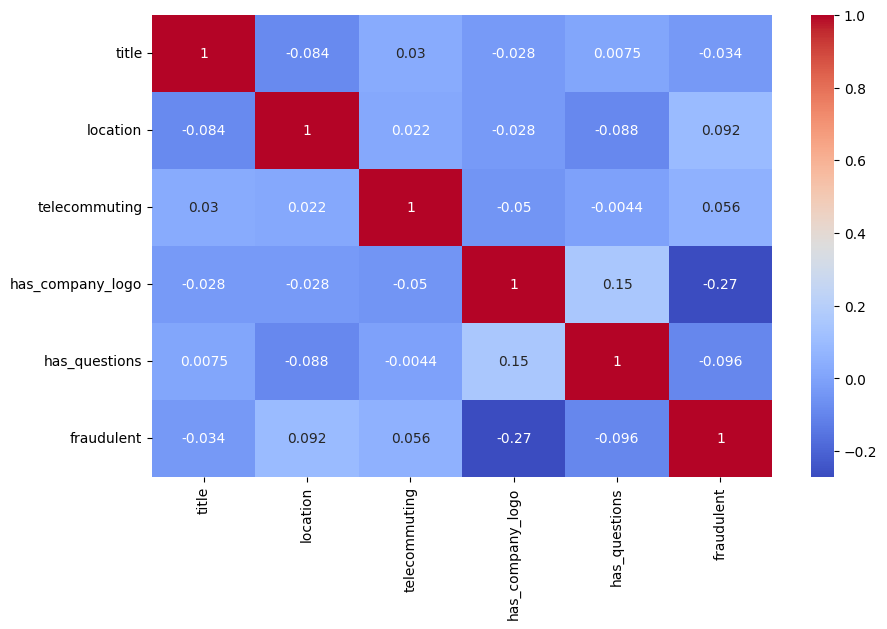

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "coolwarm")
plt.show()

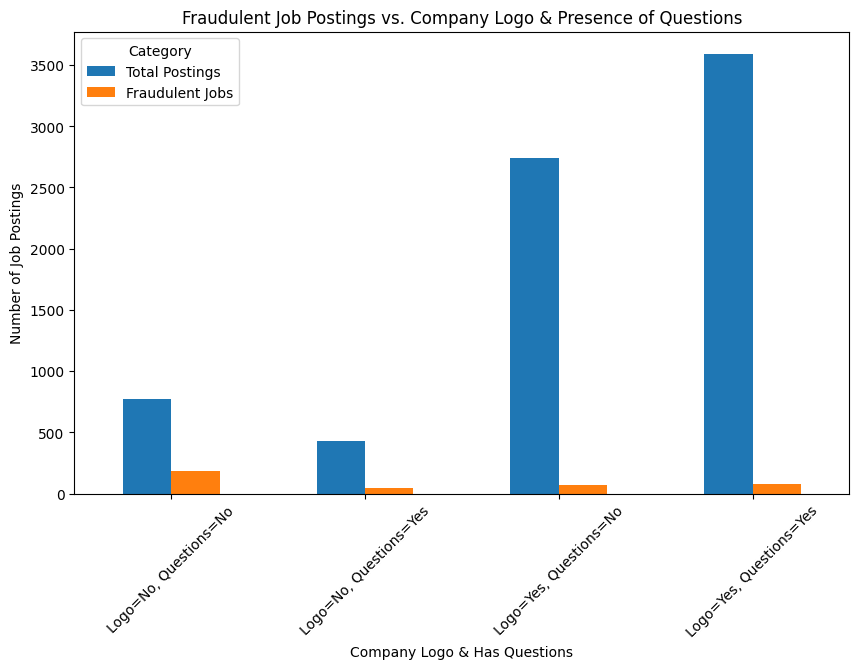

In [ ]:
grouped_data = df.groupby(['has_company_logo', 'has_questions', 'fraudulent'])['title'].count().unstack().fillna(0)
plot_data = pd.DataFrame({
    'Total Postings': grouped_data.sum(axis=1),
    'Fraudulent Jobs': grouped_data[1]
})
plot_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Company Logo & Has Questions')
plt.ylabel('Number of Job Postings')
plt.title('Fraudulent Job Postings vs. Company Logo & Presence of Questions')
plt.xticks(ticks=[0, 1, 2, 3], labels=[
    'Logo=No, Questions=No',
    'Logo=No, Questions=Yes',
    'Logo=Yes, Questions=No',
    'Logo=Yes, Questions=Yes'
], rotation=45)

plt.legend(title='Category')
plt.show()

Changing datatypes of text fields to optimize it for analysis and classification.

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000, ngram_range = (1,2))
X_description = tfidf.fit_transform(df["description"]).toarray()
X_requirements = tfidf.fit_transform(df["requirements"]).toarray()
X = np.hstack((X_description, X_requirements, df[["telecommuting", "has_company_logo", "has_questions"]].values))


Scaling the data and identifying the target variable.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = df["fraudulent"]

Performing PCA (Principal component analysis) to track explained variance of features in order to identify the information given by each feature and discard the features giving less information.

In [ ]:
pca = PCA(n_components = 0.90)
X_pca = pca.fit_transform(X)
print(f"Shape of X before PCA: {X.shape}")
print(f"Shape of X after PCA: {X_pca.shape}")
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
cumulative_variance = np.cumsum(explained_variance)
print(f"Cumulative Explained Variance: {cumulative_variance}")

Shape of X before PCA: (7533, 10003)
Shape of X after PCA: (7533, 2887)
Explained Variance Ratio: [1.73531393e-02 1.35611977e-02 1.22514399e-02 ... 8.38835024e-05
 8.38098067e-05 8.38038792e-05]
Cumulative Explained Variance: [0.01735314 0.03091434 0.04316578 ... 0.89990011 0.89998392 0.90006773]


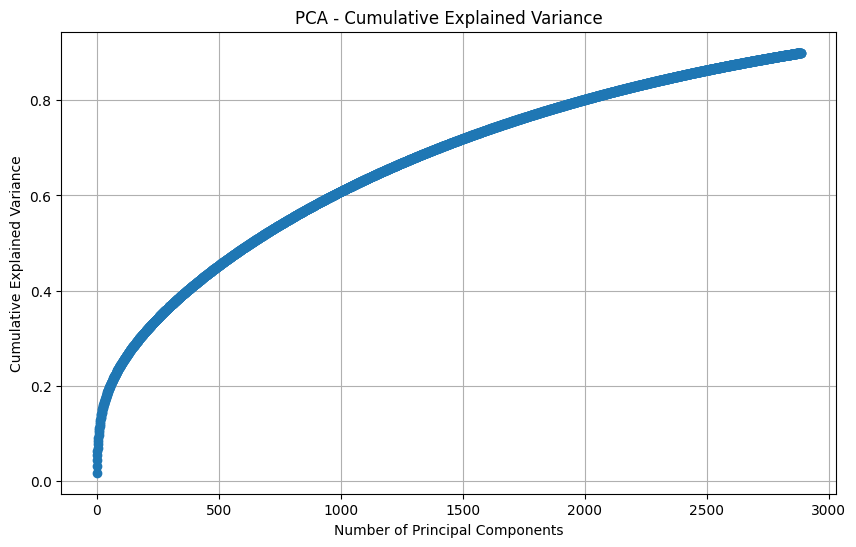

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker = "o")
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()

Using SMOTE to balance the datasets by accounting for lesser represented classes.

In [ ]:
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_pca, df["fraudulent"])

Splitting the dataset into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

Using logistic regression to perform binary classification between fraudulent and non-fraudulent job postings.

In [ ]:
model = LogisticRegression(random_state=42, penalty="l2", C=1.0, solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Making predictions with the trained model.

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

Evaluating the model using accuracy, classification report, and area under curve (AUC) method.

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9902200488997555
ROC-AUC Score: 0.9989864238378278
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1428
           1       0.98      1.00      0.99      1435

    accuracy                           0.99      2863
   macro avg       0.99      0.99      0.99      2863
weighted avg       0.99      0.99      0.99      2863



In [ ]:
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring="accuracy")
print(f"Cross-Validation Accuracy: {np.mean(cv_scores)}")

Cross-Validation Accuracy: 0.99231414175364


Hence the model is able to make predictions with 99.23% accuracy